Yahoo Finance is the main data source.
https://pypi.org/project/yfinance/ 
Or you can use your choice of data provider


# Download Data

[Yahoo Finance](https://pypi.org/project/yfinance/) is one of the most popular data sources.  
Or you can use your choice of data provider

**Data Frame**
2 dimensional labeled data table in the Pandas library for Python.

In [1]:
import yfinance as yf
from datetime import date

def download_data(symbol, period, interval):
    tickerData = yf.Ticker(symbol)
    tickerDf = tickerData.history(
        period=period,
        interval=interval,
    )
    tickerDf = tickerDf[tickerDf.High != tickerDf.Low]
    tickerDf.to_csv(f"../data/{symbol.lower()}-{period}-{interval}.csv")
    return tickerDf

symbol = '^IXIC'
period = '1y'
interval = '1h'
tradingData = download_data(symbol, period, interval)
tradingData

Open          High           Low  \
Datetime                                                              
2023-04-25 13:30:00-04:00  11862.315430  11864.176758  11822.761719   
2023-04-25 14:30:00-04:00  11842.570312  11854.994141  11827.439453   
2023-04-25 15:30:00-04:00  11830.272461  11841.526367  11798.982422   
2023-04-26 09:30:00-04:00  11915.990234  11927.615234  11867.620117   
2023-04-26 10:30:00-04:00  11884.488281  11953.151367  11883.955078   
...                                 ...           ...           ...   
2024-04-25 09:30:00-04:00  15379.724609  15503.274414  15346.181641   
2024-04-25 10:30:00-04:00  15494.054688  15498.080078  15416.459961   
2024-04-25 11:30:00-04:00  15466.553711  15521.806641  15432.965820   
2024-04-25 12:30:00-04:00  15518.511719  15562.813477  15502.249023   
2024-04-25 13:30:00-04:00  15541.415039  15615.137695  15539.962891   

                                  Close      Volume  Dividends  Stock Splits  
Datetime                                                                      
2023-04-25 13:30:00-04:00  11843.119141           0        0.0           0.0  
2023-04-25 14:30:00-04:00  11830.783203   427345000        0.0           0.0  
2023-04-25 15:30:00-04:00  11800.601562   479935000        0.0           0.0  
2023-04-26 09:30:00-04:00  11883.130859           0        0.0           0.0  
2023-04-26 10:30:00-04:00  11934.798828   740334000        0.0           0.0  
...                                 ...         ...        ...           ...  
2024-04-25 09:30:00-04:00  15494.110352   972257417        0.0           0.0  
2024-04-25 10:30:00-04:00  15466.282227   588031000        0.0           0.0  
2024-04-25 11:30:00-04:00  15518.300781  2232444000        0.0           0.0  
2024-04-25 12:30:00-04:00  15542.409180   340813000        0.0           0.0  
2024-04-25 13:30:00-04:00  15603.649414   182078000        0.0           0.0  

[1757 rows x 7 columns]

# Pandas

- open source data analysis and manipulation tool, built on top of the Python programming language.
- https://pandas.pydata.org/ 

In [2]:
# Read data into pandas DataFrame
import pandas as pd

def read_data(symbol, period, interval):
    data = pd.read_csv(f'../data/{symbol}-{period}-{interval}.csv')
    data.Datetime = pd.to_datetime(data.Datetime, utc=True)
    data.set_index('Datetime', inplace=False)
    data.drop(['Dividends', 'Stock Splits', 'Volume'], axis=1, inplace=True)
    return data


tradingData = read_data(symbol, period, interval)
tradingData

Datetime          Open          High           Low  \
0    2023-04-25 17:30:00+00:00  11862.315430  11864.176758  11822.761719   
1    2023-04-25 18:30:00+00:00  11842.570312  11854.994141  11827.439453   
2    2023-04-25 19:30:00+00:00  11830.272461  11841.526367  11798.982422   
3    2023-04-26 13:30:00+00:00  11915.990234  11927.615234  11867.620117   
4    2023-04-26 14:30:00+00:00  11884.488281  11953.151367  11883.955078   
...                        ...           ...           ...           ...   
1752 2024-04-25 13:30:00+00:00  15379.724609  15503.274414  15346.181641   
1753 2024-04-25 14:30:00+00:00  15494.054688  15498.080078  15416.459961   
1754 2024-04-25 15:30:00+00:00  15466.553711  15521.806641  15432.965820   
1755 2024-04-25 16:30:00+00:00  15518.511719  15562.813477  15502.249023   
1756 2024-04-25 17:30:00+00:00  15541.415039  15615.137695  15539.962891   

             Close  
0     11843.119141  
1     11830.783203  
2     11800.601562  
3     11883.130859  
4     11934.798828  
...            ...  
1752  15494.110352  
1753  15466.282227  
1754  15518.300781  
1755  15542.409180  
1756  15603.649414  

[1757 rows x 5 columns]

**TA (Technical Analysis Library)**

- Technical Analysis library to financial time series datasets (open, close, high, low, volume)
- https://technical-analysis-library-in-python.readthedocs.io/en/latest/
- https://github.com/bukosabino/ta 


**Pandas TA**

- Pandas extension with TA library
- https://github.com/twopirllc/pandas-ta 


**loc**

- select and manipulate data, targeting rows and columns based on labels (index values or column names)


In [3]:
# Set MACD
import pandas_ta as ta

def set_macd(data):
    macd = ta.macd(data.Close)
    data['MACD'] = macd.loc[:, 'MACD_12_26_9']
    data['MACD_signal'] = macd.loc[:, 'MACDs_12_26_9']
    data['MACD_histogram'] = macd.loc[:, 'MACDh_12_26_9']

set_macd(tradingData)
tradingData

Datetime          Open          High           Low  \
0    2023-04-25 17:30:00+00:00  11862.315430  11864.176758  11822.761719   
1    2023-04-25 18:30:00+00:00  11842.570312  11854.994141  11827.439453   
2    2023-04-25 19:30:00+00:00  11830.272461  11841.526367  11798.982422   
3    2023-04-26 13:30:00+00:00  11915.990234  11927.615234  11867.620117   
4    2023-04-26 14:30:00+00:00  11884.488281  11953.151367  11883.955078   
...                        ...           ...           ...           ...   
1752 2024-04-25 13:30:00+00:00  15379.724609  15503.274414  15346.181641   
1753 2024-04-25 14:30:00+00:00  15494.054688  15498.080078  15416.459961   
1754 2024-04-25 15:30:00+00:00  15466.553711  15521.806641  15432.965820   
1755 2024-04-25 16:30:00+00:00  15518.511719  15562.813477  15502.249023   
1756 2024-04-25 17:30:00+00:00  15541.415039  15615.137695  15539.962891   

             Close       MACD  MACD_signal  MACD_histogram  
0     11843.119141        NaN          NaN             NaN  
1     11830.783203        NaN          NaN             NaN  
2     11800.601562        NaN          NaN             NaN  
3     11883.130859        NaN          NaN             NaN  
4     11934.798828        NaN          NaN             NaN  
...            ...        ...          ...             ...  
1752  15494.110352  16.879232    18.101394       -1.222162  
1753  15466.282227   0.770509    14.635217      -13.864708  
1754  15518.300781  -7.709438    10.166286      -17.875724  
1755  15542.409180 -12.342237     5.664581      -18.006818  
1756  15603.649414 -10.946010     2.342463      -13.288473  

[1757 rows x 8 columns]

**tqdm**

- shows progress bar while applying the function to the given data frame
- taqaddum means "progress" in Arabic

**signal**

- 1 to buy, -1 to sell, and 0 to stay calm

In [4]:
# Set MACD Signal
from tqdm import tqdm
tqdm.pandas()

def macd_trade_signal(data, current):
    if (
        all(data.loc[current - 3:current - 2, 'MACD'] <
            data.loc[current - 3:current - 2, 'MACD_signal']) and
        all(data.loc[current - 1:current, 'MACD'] >
            data.loc[current - 1:current, 'MACD_signal'])
    ):
        return 1
    if (
        all(data.loc[current - 3:current - 2, 'MACD'] >
            data.loc[current - 3:current - 2, 'MACD_signal']) and
        all(data.loc[current - 1:current, 'MACD'] <
            data.loc[current - 1:current, 'MACD_signal'])
    ):
        return -1
    return 0

def set_macd_trade_signal(data):
    data['MACD_trade_signal'] = data.progress_apply(
        lambda r: macd_trade_signal(data, r.name),
        axis='columns'
    )
    return data

set_macd_trade_signal(tradingData)
tradingData

100%|██████████| 1757/1757 [00:00<00:00, 5120.44it/s]


Datetime          Open          High           Low  \
0    2023-04-25 17:30:00+00:00  11862.315430  11864.176758  11822.761719   
1    2023-04-25 18:30:00+00:00  11842.570312  11854.994141  11827.439453   
2    2023-04-25 19:30:00+00:00  11830.272461  11841.526367  11798.982422   
3    2023-04-26 13:30:00+00:00  11915.990234  11927.615234  11867.620117   
4    2023-04-26 14:30:00+00:00  11884.488281  11953.151367  11883.955078   
...                        ...           ...           ...           ...   
1752 2024-04-25 13:30:00+00:00  15379.724609  15503.274414  15346.181641   
1753 2024-04-25 14:30:00+00:00  15494.054688  15498.080078  15416.459961   
1754 2024-04-25 15:30:00+00:00  15466.553711  15521.806641  15432.965820   
1755 2024-04-25 16:30:00+00:00  15518.511719  15562.813477  15502.249023   
1756 2024-04-25 17:30:00+00:00  15541.415039  15615.137695  15539.962891   

             Close       MACD  MACD_signal  MACD_histogram  MACD_trade_signal  
0     11843.119141        NaN          NaN             NaN                  0  
1     11830.783203        NaN          NaN             NaN                  0  
2     11800.601562        NaN          NaN             NaN                  0  
3     11883.130859        NaN          NaN             NaN                  0  
4     11934.798828        NaN          NaN             NaN                  0  
...            ...        ...          ...             ...                ...  
1752  15494.110352  16.879232    18.101394       -1.222162                  0  
1753  15466.282227   0.770509    14.635217      -13.864708                 -1  
1754  15518.300781  -7.709438    10.166286      -17.875724                  0  
1755  15542.409180 -12.342237     5.664581      -18.006818                  0  
1756  15603.649414 -10.946010     2.342463      -13.288473                  0  

[1757 rows x 9 columns]

- Pass `total_trade_signal` function as parameter.
- Filter data frame with the given predicate condition

In [5]:
def total_trade_signal(row):
    if (row.MACD_trade_signal == 1):
        return 1
    elif (row.MACD_trade_signal == -1):
        return -1
    else:
        return 0

def set_total_trade_signal(data, total_trade_signal):
    data['Total_trade_signal'] = data.progress_apply(
        lambda r: total_trade_signal(r),
        axis='columns'
    )
    return data

set_total_trade_signal(tradingData, total_trade_signal)
print(f'number of trades: {tradingData[tradingData.Total_trade_signal != 0].shape[0]}')

tradingData[tradingData.Total_trade_signal != 0]


  0%|          | 0/1757 [00:00<?, ?it/s]

100%|██████████| 1757/1757 [00:00<00:00, 134935.95it/s]

number of trades: 127


Datetime          Open          High           Low  \
54   2023-05-05 15:30:00+00:00  12184.857422  12185.057617  12165.870117   
68   2023-05-09 15:30:00+00:00  12186.077148  12193.833008  12174.130859   
75   2023-05-10 15:30:00+00:00  12266.905273  12287.129883  12240.588867   
77   2023-05-10 17:30:00+00:00  12186.553711  12262.742188  12180.859375   
79   2023-05-10 19:30:00+00:00  12323.703125  12337.689453  12300.197266   
...                        ...           ...           ...           ...   
1693 2024-04-12 17:30:00+00:00  16145.599609  16189.479492  16136.209961   
1720 2024-04-18 16:30:00+00:00  15740.727539  15742.808594  15606.067383   
1722 2024-04-18 18:30:00+00:00  15620.649414  15639.794922  15587.633789   
1735 2024-04-22 17:30:00+00:00  15448.073242  15528.640625  15448.073242   
1753 2024-04-25 14:30:00+00:00  15494.054688  15498.080078  15416.459961   

             Close        MACD  MACD_signal  MACD_histogram  \
54    12170.349609    5.451292    -7.969267       13.420559   
68    12175.614258   32.099048    37.163318       -5.064270   
75    12262.987305   31.378111    29.870170        1.507941   
77    12252.806641   26.945831    28.707786       -1.761955   
79    12305.219727   35.630343    30.759669        4.870674   
...            ...         ...          ...             ...   
1693  16170.419922   -2.460695     9.791653      -12.252348   
1720  15647.046875 -105.598447  -106.054135        0.455688   
1722  15617.905273 -109.507376  -107.122602       -2.384773   
1735  15522.136719 -119.657220  -144.263172       24.605952   
1753  15466.282227    0.770509    14.635217      -13.864708   

      MACD_trade_signal  Total_trade_signal  
54                    1                   1  
68                   -1                  -1  
75                    1                   1  
77                   -1                  -1  
79                    1                   1  
...                 ...                 ...  
1693                 -1                  -1  
1720                  1                   1  
1722                 -1                  -1  
1735                  1                   1  
1753                 -1                  -1  

[127 rows x 10 columns]

**Backtesting**

- a Python framework for inferring viability of trading strategies on historical (past) data
- https://kernc.github.io/backtesting.py/

**ATR**

- Average True Range
- measures market volatility
- https://www.investopedia.com/terms/a/atr.asp


/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_32163/2266502320.py:44: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  backtest = Backtest(data, MacdStrategy, cash=cash,
/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/8 [00:00<?, ?it/s]

Start                                     0.0
End                                    1756.0
Duration                               1756.0
Exposure Time [%]                    65.28173
Equity Final [$]                 32431.981452
Equity Peak [$]                  34216.973368
Return [%]                          29.727926
Buy & Hold Return [%]                31.75287
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -14.667547
Avg. Drawdown [%]                   -1.263612
Max. Drawdown Duration                  936.0
Avg. Drawdown Duration              33.702128
# Trades                                 62.0
Win Rate [%]                        38.709677
Best Trade [%]                       3.632565
Worst Trade [%]                     -2.275865
Avg. Trade [%]                    

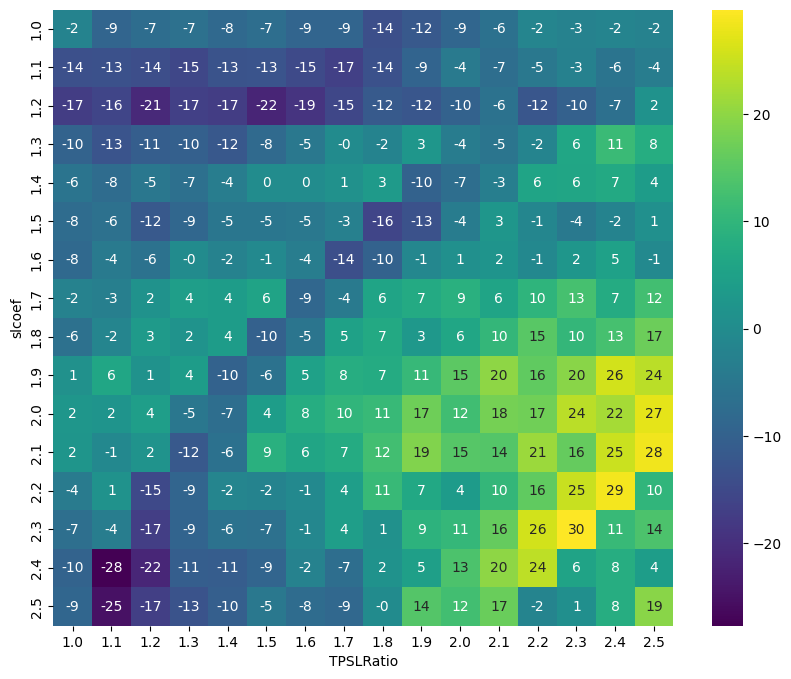

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from backtesting import Strategy
from backtesting import Backtest

def set_atr(data):
    data['ATR'] = ta.atr(data.High, data.Low, data.Close, length=7)
    return data


class MacdStrategy(Strategy):
    mysize = 3
    slcoef = 1.1
    TPSLRatio = 1.5

    def init(self):
        super().init()
        self.signal1 = self.I(lambda: self.data.Total_trade_signal)

    def next(self):
        super().next()
        slatr = self.slcoef * self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio

        if self.signal1 == 1 and len(self.trades) == 0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr * TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)

        elif self.signal1 == -1 and len(self.trades) == 0:
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

def show_heatmap(heatmap):
    # Convert multiindex series to dataframe
    heatmap_dataFrame = heatmap.unstack()
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_dataFrame, annot=True, cmap='viridis', fmt='.0f')
    plt.show()


def backtest_trading(data, cash):
    backtest = Backtest(data, MacdStrategy, cash=cash,
                        margin=1/30, commission=0.00)
    stats, heatmap = backtest.optimize(slcoef=[i/10 for i in range(10, 26)],
                                       TPSLRatio=[i/10 for i in range(10, 26)],
                                       maximize='Return [%]', max_tries=300,
                                       random_state=0,
                                       return_heatmap=True)

    return stats, heatmap

set_atr(tradingData)
stats, heatmap = backtest_trading(tradingData, 25000)

print(stats)
show_heatmap(heatmap)



**Trade Log**

- It's helpful to understand where we make profit and loss

In [7]:
trade_log = stats["_trades"]
trade_log

Size  EntryBar  ExitBar    EntryPrice     ExitPrice          PnL  \
0      3        55      112  12170.628906  12506.287323  1006.975251   
1     -3       128      134  12642.103516  12747.343115  -315.718797   
2      3       153      164  12703.646484  13109.502930  1217.569336   
3     -3       173      180  12901.988281  13046.655523  -434.001727   
4      3       184      220  13105.404297  13379.284037   821.639222   
..   ...       ...      ...           ...           ...          ...   
57     3      1663     1675  16294.114258  16102.668945  -574.335938   
58    -3      1677     1685  16156.117188  16354.330507  -594.639958   
59    -3      1694     1712  16170.578125  15768.455026  1206.369297   
60     3      1721     1724  15645.257812  15445.464190  -599.380867   
61     3      1736     1756  15522.673828  15541.415039    56.223633   

    ReturnPct  EntryTime  ExitTime  Duration  
0    0.027579         55       112        57  
1   -0.008325        128       134         6  
2    0.031948        153       164        11  
3   -0.011213        173       180         7  
4    0.020898        184       220        36  
..        ...        ...       ...       ...  
57  -0.011749       1663      1675        12  
58  -0.012269       1677      1685         8  
59   0.024868       1694      1712        18  
60  -0.012770       1721      1724         3  
61   0.001207       1736      1756        20  

[62 rows x 10 columns]

In [8]:
def set_ema(data, ema_length):
    data['EMA'] = ta.ema(data.Close, length=ema_length)
    return data

set_ema(tradingData, 200)

tradingData

Datetime          Open          High           Low  \
0    2023-04-25 17:30:00+00:00  11862.315430  11864.176758  11822.761719   
1    2023-04-25 18:30:00+00:00  11842.570312  11854.994141  11827.439453   
2    2023-04-25 19:30:00+00:00  11830.272461  11841.526367  11798.982422   
3    2023-04-26 13:30:00+00:00  11915.990234  11927.615234  11867.620117   
4    2023-04-26 14:30:00+00:00  11884.488281  11953.151367  11883.955078   
...                        ...           ...           ...           ...   
1752 2024-04-25 13:30:00+00:00  15379.724609  15503.274414  15346.181641   
1753 2024-04-25 14:30:00+00:00  15494.054688  15498.080078  15416.459961   
1754 2024-04-25 15:30:00+00:00  15466.553711  15521.806641  15432.965820   
1755 2024-04-25 16:30:00+00:00  15518.511719  15562.813477  15502.249023   
1756 2024-04-25 17:30:00+00:00  15541.415039  15615.137695  15539.962891   

             Close       MACD  MACD_signal  MACD_histogram  MACD_trade_signal  \
0     11843.119141        NaN          NaN             NaN                  0   
1     11830.783203        NaN          NaN             NaN                  0   
2     11800.601562        NaN          NaN             NaN                  0   
3     11883.130859        NaN          NaN             NaN                  0   
4     11934.798828        NaN          NaN             NaN                  0   
...            ...        ...          ...             ...                ...   
1752  15494.110352  16.879232    18.101394       -1.222162                  0   
1753  15466.282227   0.770509    14.635217      -13.864708                 -1   
1754  15518.300781  -7.709438    10.166286      -17.875724                  0   
1755  15542.409180 -12.342237     5.664581      -18.006818                  0   
1756  15603.649414 -10.946010     2.342463      -13.288473                  0   

      Total_trade_signal         ATR           EMA  
0                      0         NaN           NaN  
1                      0         NaN           NaN  
2                      0         NaN           NaN  
3                      0         NaN           NaN  
4                      0         NaN           NaN  
...                  ...         ...           ...  
1752                   0  110.214584  15958.366473  
1753                  -1  106.129660  15953.470113  
1754                   0  103.659826  15949.140069  
1755                   0   97.503344  15945.092996  
1756                   0   94.313553  15941.695547  

[1757 rows x 12 columns]

In [9]:
trade_log_analysis = trade_log.merge(tradingData[['Close', 'EMA']], left_on='EntryBar', right_index=True)
trade_log_analysis = trade_log_analysis.reindex(columns=['Size', 'EntryBar', 'Close', 'EMA', 'ExitBar', 'EntryPrice', 'ExitPrice', 'PnL', 'ReturnPct', 'EntryTime', 'ExitTime', 'Duration'])
trade_log_analysis[trade_log_analysis.PnL < 0]

Size  EntryBar  ExitBar    EntryPrice     ExitPrice          PnL  \
1     -3       128      134  12642.103516  12747.343115  -315.718797   
3     -3       173      180  12901.988281  13046.655523  -434.001727   
6     -3       247      253  13589.793945  13777.337619  -562.631020   
9     -3       333      363  13779.315430  13918.894531  -418.737305   
10    -3       384      388  14155.006836  14223.356433  -205.048791   
11     3       397      405  14380.698242  14265.297852  -346.201172   
12     3       428      469  14131.869141  14006.545872  -375.969807   
13     3       484      489  14065.802734  13897.628488  -504.522739   
16    -3       584      594  13553.842773  13713.290180  -478.342220   
19     3       653      692  13803.750000  13663.455078  -420.884766   
20     3       707      711  13674.985352  13566.021212  -326.892419   
22    -3       739      750  13069.354492  13210.761440  -424.220844   
23    -3       771      791  13076.560547  13284.025658  -622.395333   
24    -3       815      818  13570.571289  13698.635756  -384.193400   
25     3       838      839  13595.810547  13419.575195  -528.706055   
27     3       872      883  13087.428711  12917.034464  -511.182740   
28    -3       885      921  12848.205078  13023.284691  -525.238838   
29    -3       942      944  13468.127930  13572.544550  -313.249861   
31    -3       993     1008  14062.979492  14231.611445  -505.895857   
32     3      1011     1014  14277.504883  14171.989752  -316.545393   
33    -3      1016     1021  14169.712891  14287.642578  -353.789062   
34     3      1026     1052  14292.304688  14191.737204  -301.702451   
35     3      1063     1066  14276.063477  14135.999279  -420.192593   
36    -3      1068     1073  14100.607422  14258.138205  -472.592351   
38    -3      1135     1140  14808.207031  14930.886793  -368.039284   
39    -3      1147     1151  14965.706055  15059.221043  -280.544966   
40     3      1167     1199  15005.351562  14876.220877  -387.392055   
42    -3      1251     1255  14826.276367  15000.372070  -522.287109   
44    -3      1300     1304  15353.579102  15558.005859  -613.280273   
45     3      1306     1315  15569.273438  15434.915531  -403.073720   
46     3      1332     1334  15607.348633  15529.540384  -233.424748   
51     3      1417     1430  15825.860352  15651.309706  -523.651937   
52    -3      1431     1444  15550.663086  15904.575195 -1061.736328   
55     3      1643     1652  16319.100586  16182.020486  -411.240301   
56    -3      1654     1655  16095.825195  16245.792152  -449.900869   
57     3      1663     1675  16294.114258  16102.668945  -574.335938   
58    -3      1677     1685  16156.117188  16354.330507  -594.639958   
60     3      1721     1724  15645.257812  15445.464190  -599.380867   

    ReturnPct  EntryTime  ExitTime  Duration         Close           EMA  
1   -0.008325        128       134         6  12657.945312           NaN  
3   -0.011213        173       180         7  12903.689453           NaN  
6   -0.013800        247       253         6  13626.515625  12817.350364  
9   -0.010130        333       363        30  13817.104492  13286.756190  
10  -0.004829        384       388         4  14176.872070  13522.400535  
11  -0.008025        397       405         8  14354.893555  13613.810349  
12  -0.008868        428       469        41  14147.139648  13755.215254  
13  -0.011956        484       489         5  14102.983398  13924.282138  
16  -0.011764        584       594        10  13558.715820  13725.696161  
19  -0.010164        653       692        39  13786.064453  13796.475106  
20  -0.007968        707       711         4  13638.668945  13786.870221  
22  -0.010820        739       750        11  13042.297852  13647.003033  
23  -0.015865        771       791        20  13107.179688  13521.633043  
24  -0.009437        815       818         3  13601.779297  13468.780250  
25  -0.012962        838       839         1  13561.541016  13484.3301